In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append('../terrain-erosion-3-ways/')
from river_network import *

sys.path.append("../pipeline")
from svg_extraction import SVGExtractor
from svg_extraction import (
    get_city_coordinates, get_island_coordinates, get_island_centers, 
    get_orthogonal_samples, get_coast_coordinates, get_heightline_centers)
from image_ops import flood_image, flood_islands
from skimage.segmentation import flood, flood_fill
from skimage.morphology import opening, square

import numpy as np

from omegaconf import OmegaConf

import matplotlib.pyplot as plt
import png
import PIL

import ipywidgets as widgets
from IPython.display import display
import glob

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [7]:
paths = glob.glob("../svgs/*.svg")
paths.sort()
realm_selection = widgets.Dropdown(
    options=paths,
    description='svg:',
    disabled=False,
)
display(realm_selection)

Dropdown(description='svg:', options=('../svgs/13337.svg', '../svgs/4425.svg', '../svgs/4726.svg', '../svgs/63…

In [8]:
config = OmegaConf.load("../pipeline/config.yaml")

## exp

In [9]:
from run import run_pipeline

INFO:root:Processing realm number: 13337
INFO:realms:Setting up extractor


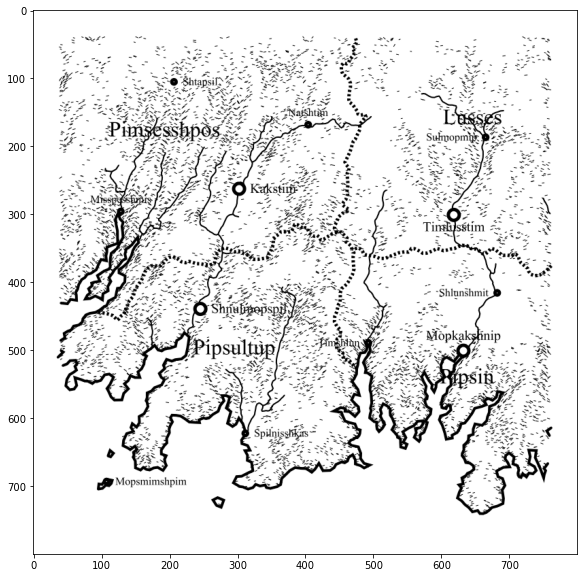

INFO:realms:    \---DONE
INFO:realms:Extracting coast
INFO:realms:    \---DONE
INFO:realms:Starting ground-sea mask logic
INFO:realms:----Calculating island centers
DEBUG:realms:island center [y,x]: [array([653.0916, 114.074 ]), array([697.298  , 106.21576]), array([723.68528, 272.68832])]
INFO:realms:    \---DONE
INFO:realms:----Extracting city centers
DEBUG:realms:city centers [y,x]: [(438.0, 246.0), (500.0, 632.0), (262.0, 302.0), (300.0, 618.0), (622.0, 312.0), (296.0, 128.0), (186.0, 664.0), (414.0, 682.0), (168.0, 404.0), (488.0, 492.0), (692.0, 108.0), (104.0, 206.0)]
INFO:realms:    \---DONE
INFO:realms:----Extracting heightline centers
DEBUG:realms:first 3 heightline clusters [y,x]: [array([ 46.56116643, 515.28632558]), array([ 42.35718385, 156.13112081]), array([ 44.97065439, 531.01775418])]
INFO:realms:    \---DONE
INFO:realms:----Filtering centers
INFO:realms:--------Filtering island centers
INFO:realms:    \---DONE
INFO:realms:--------Filtering city centers
INFO:realms:   

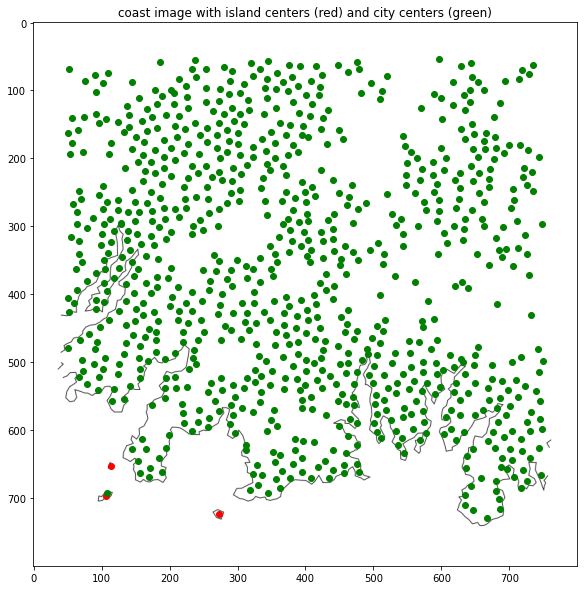

INFO:realms:----Cropping and flooding cities


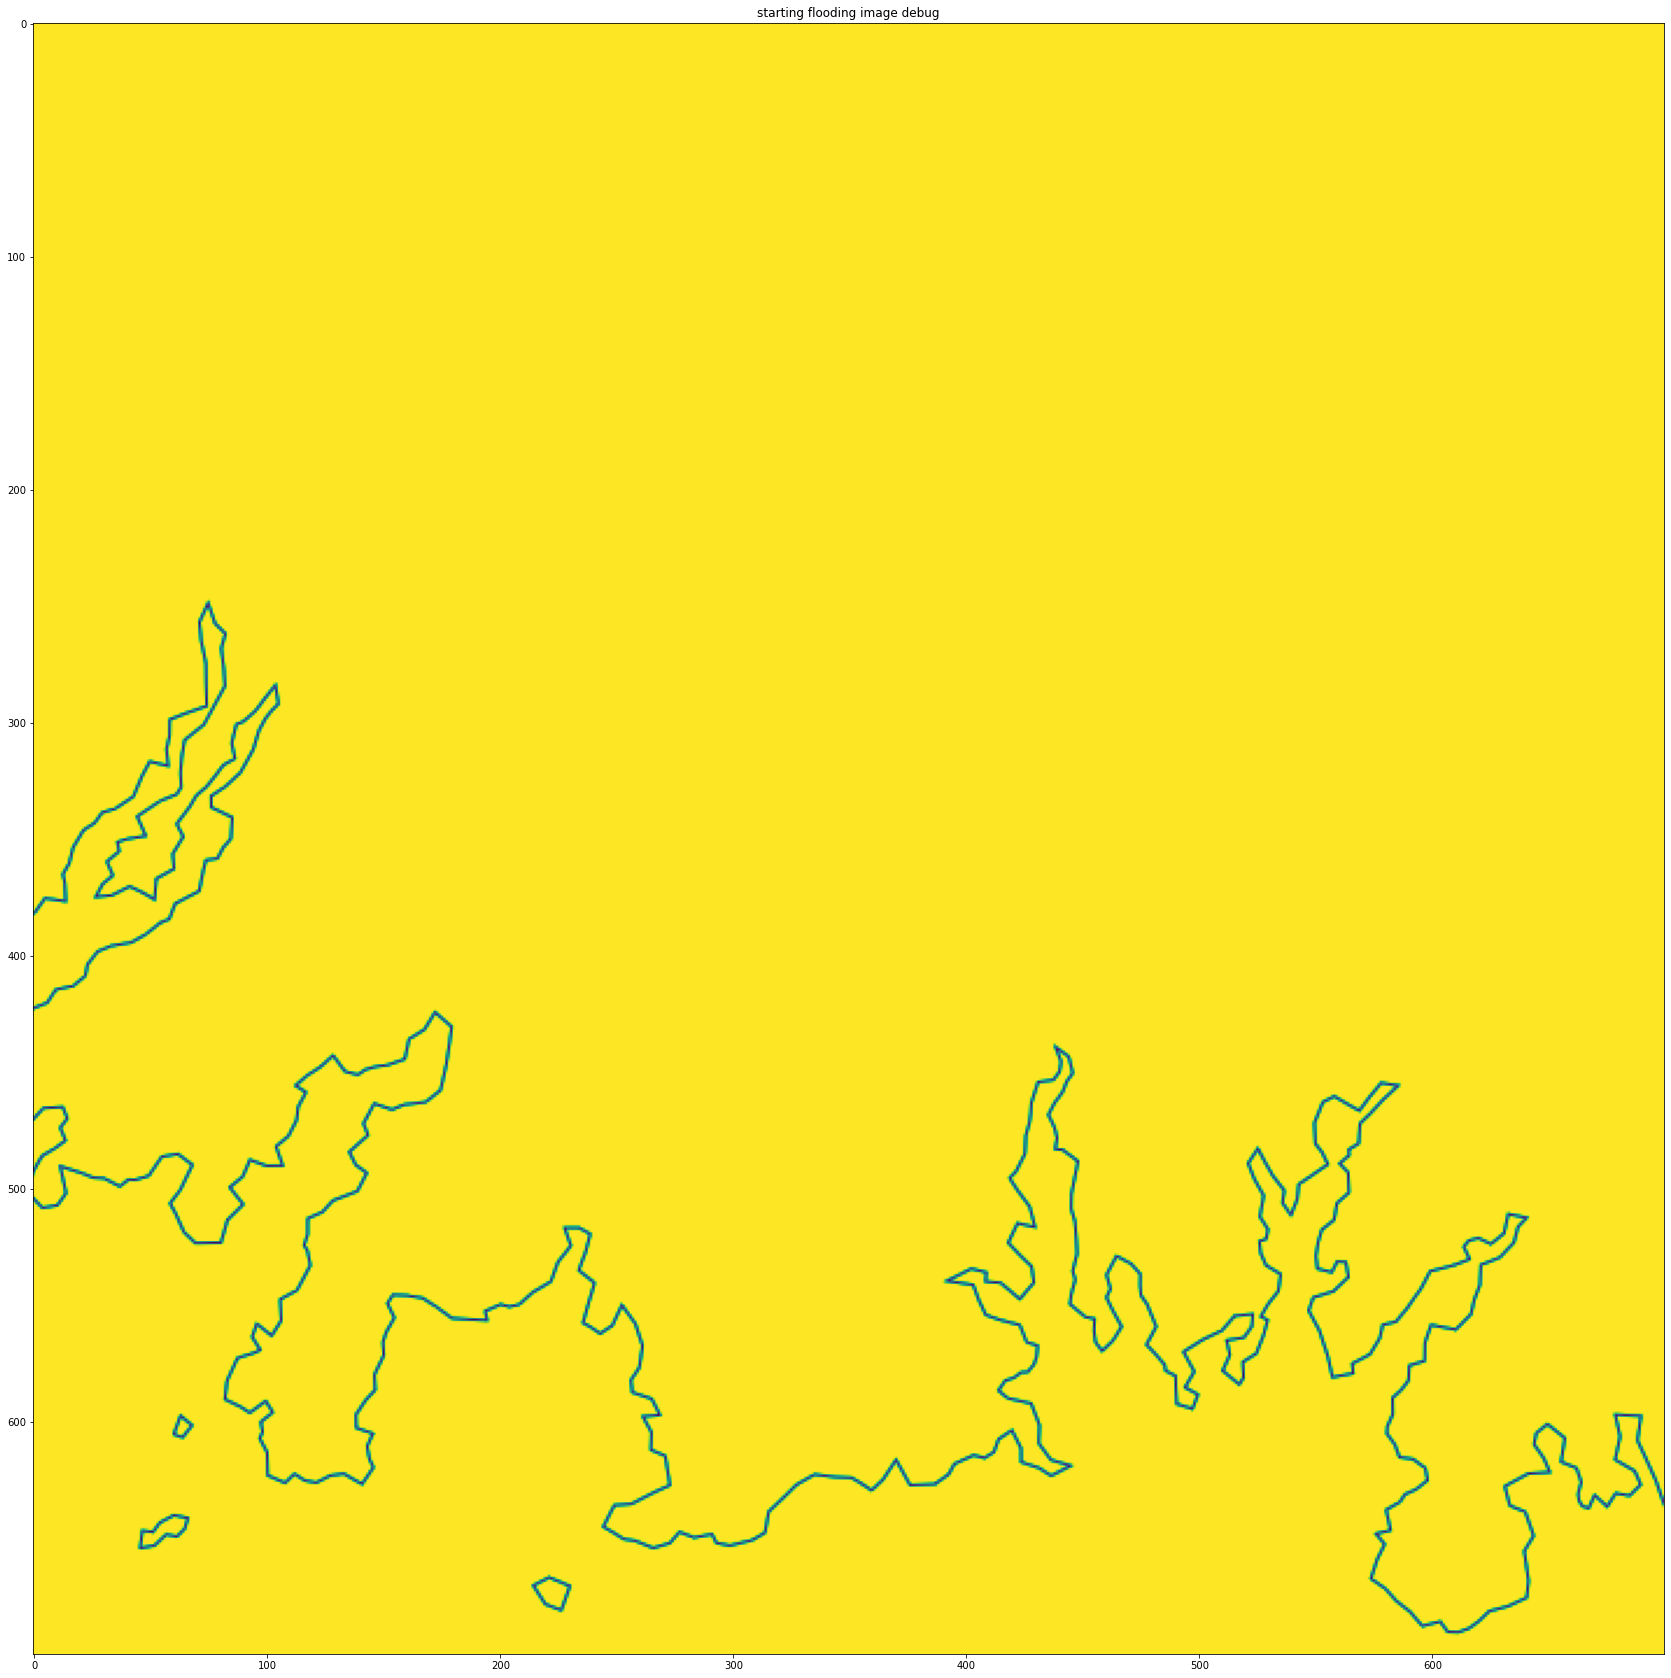

DEBUG:realms:flooding at (388, 196)


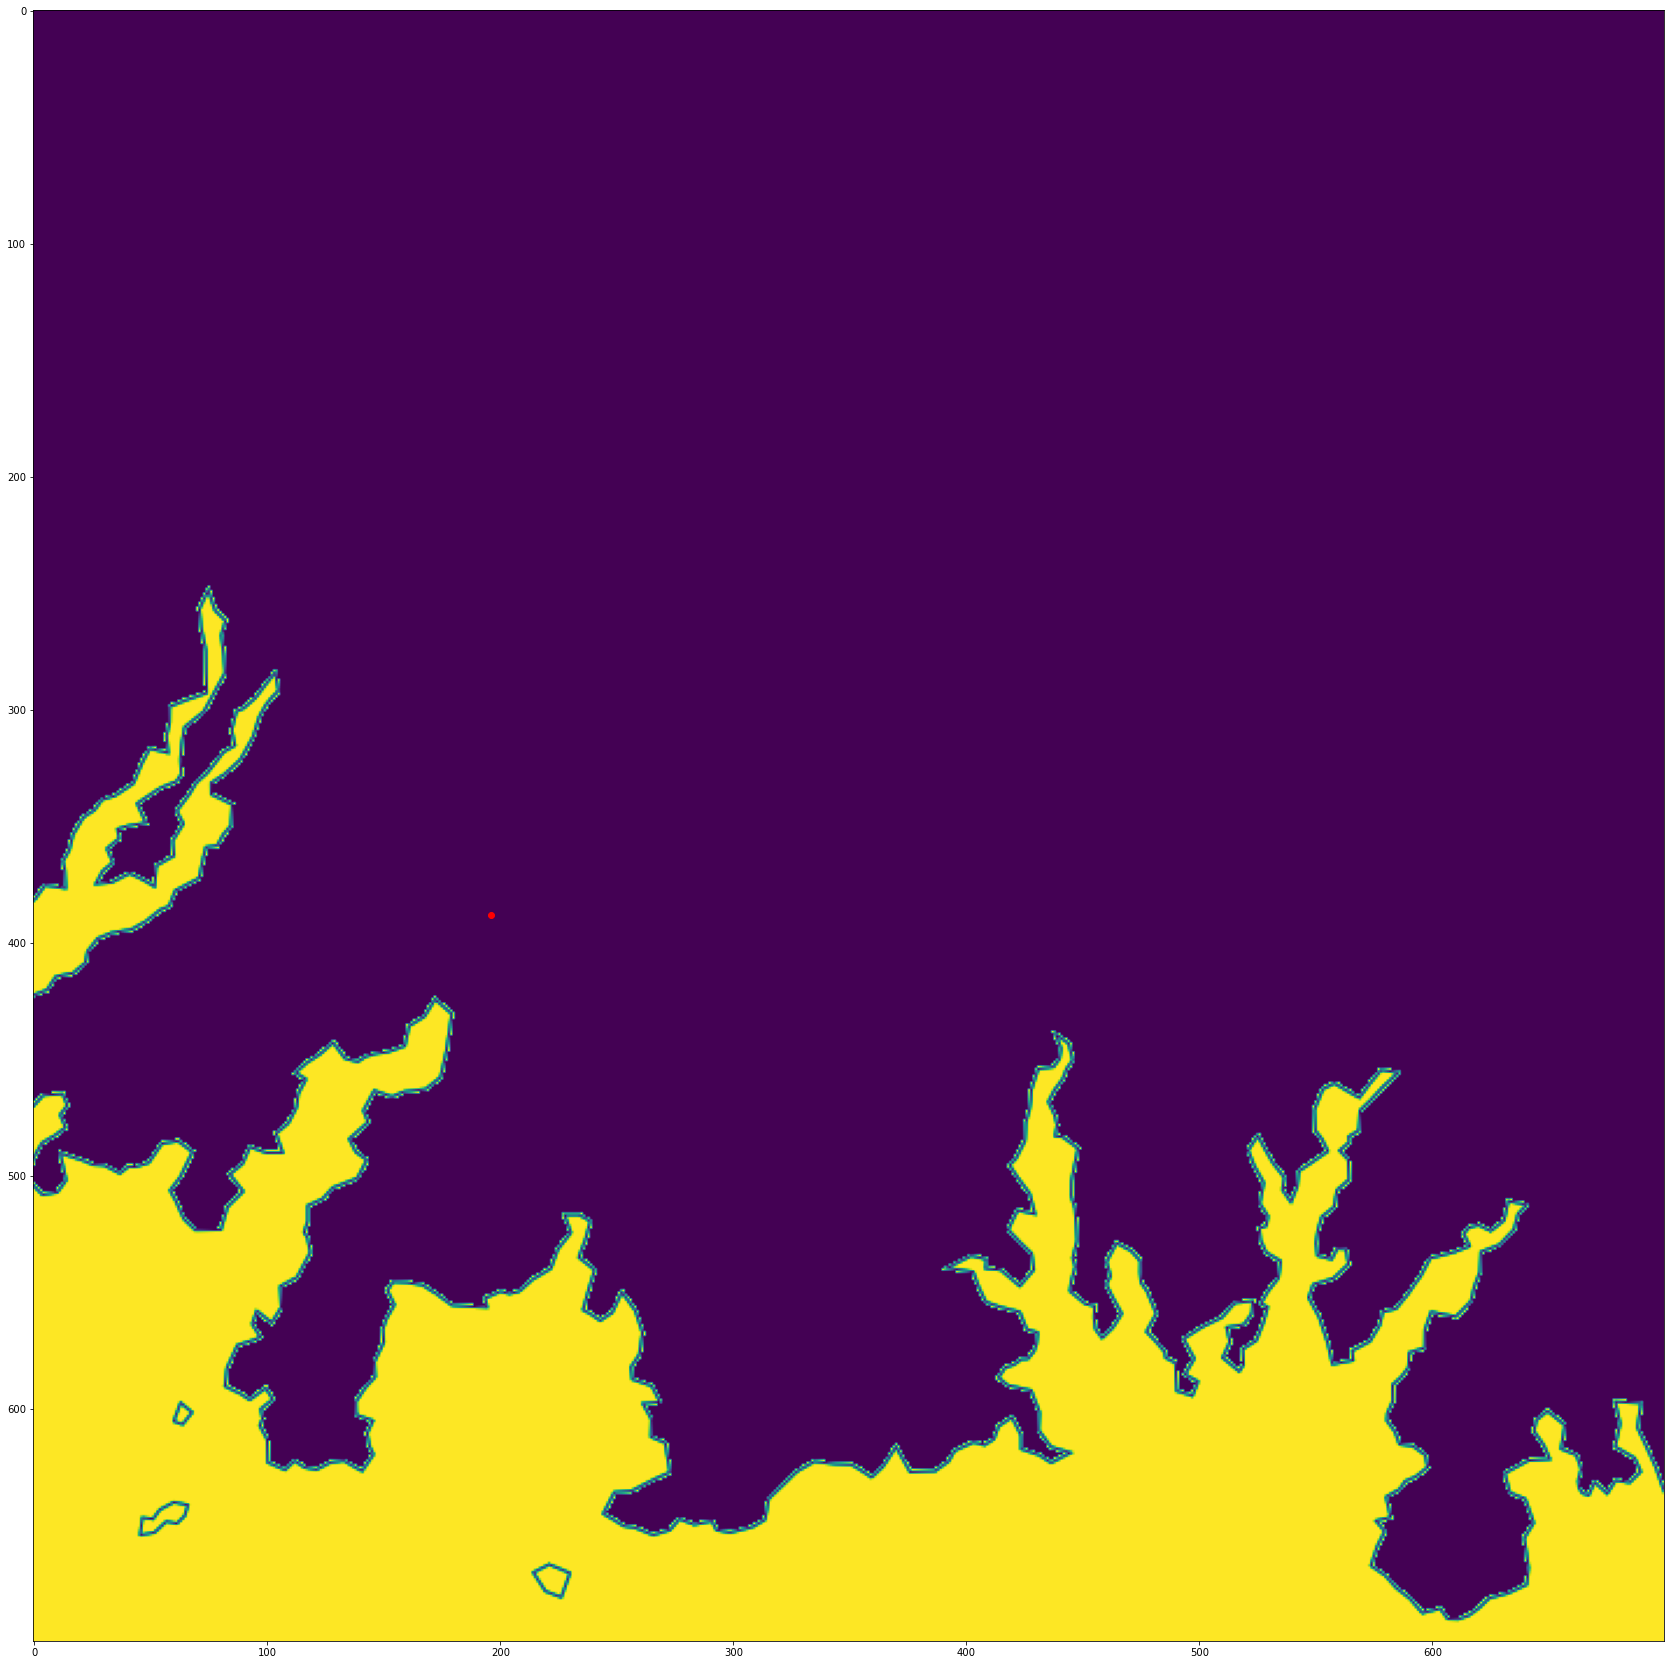

INFO:realms:    \---DONE
INFO:realms:----Flooding from heightline clusters


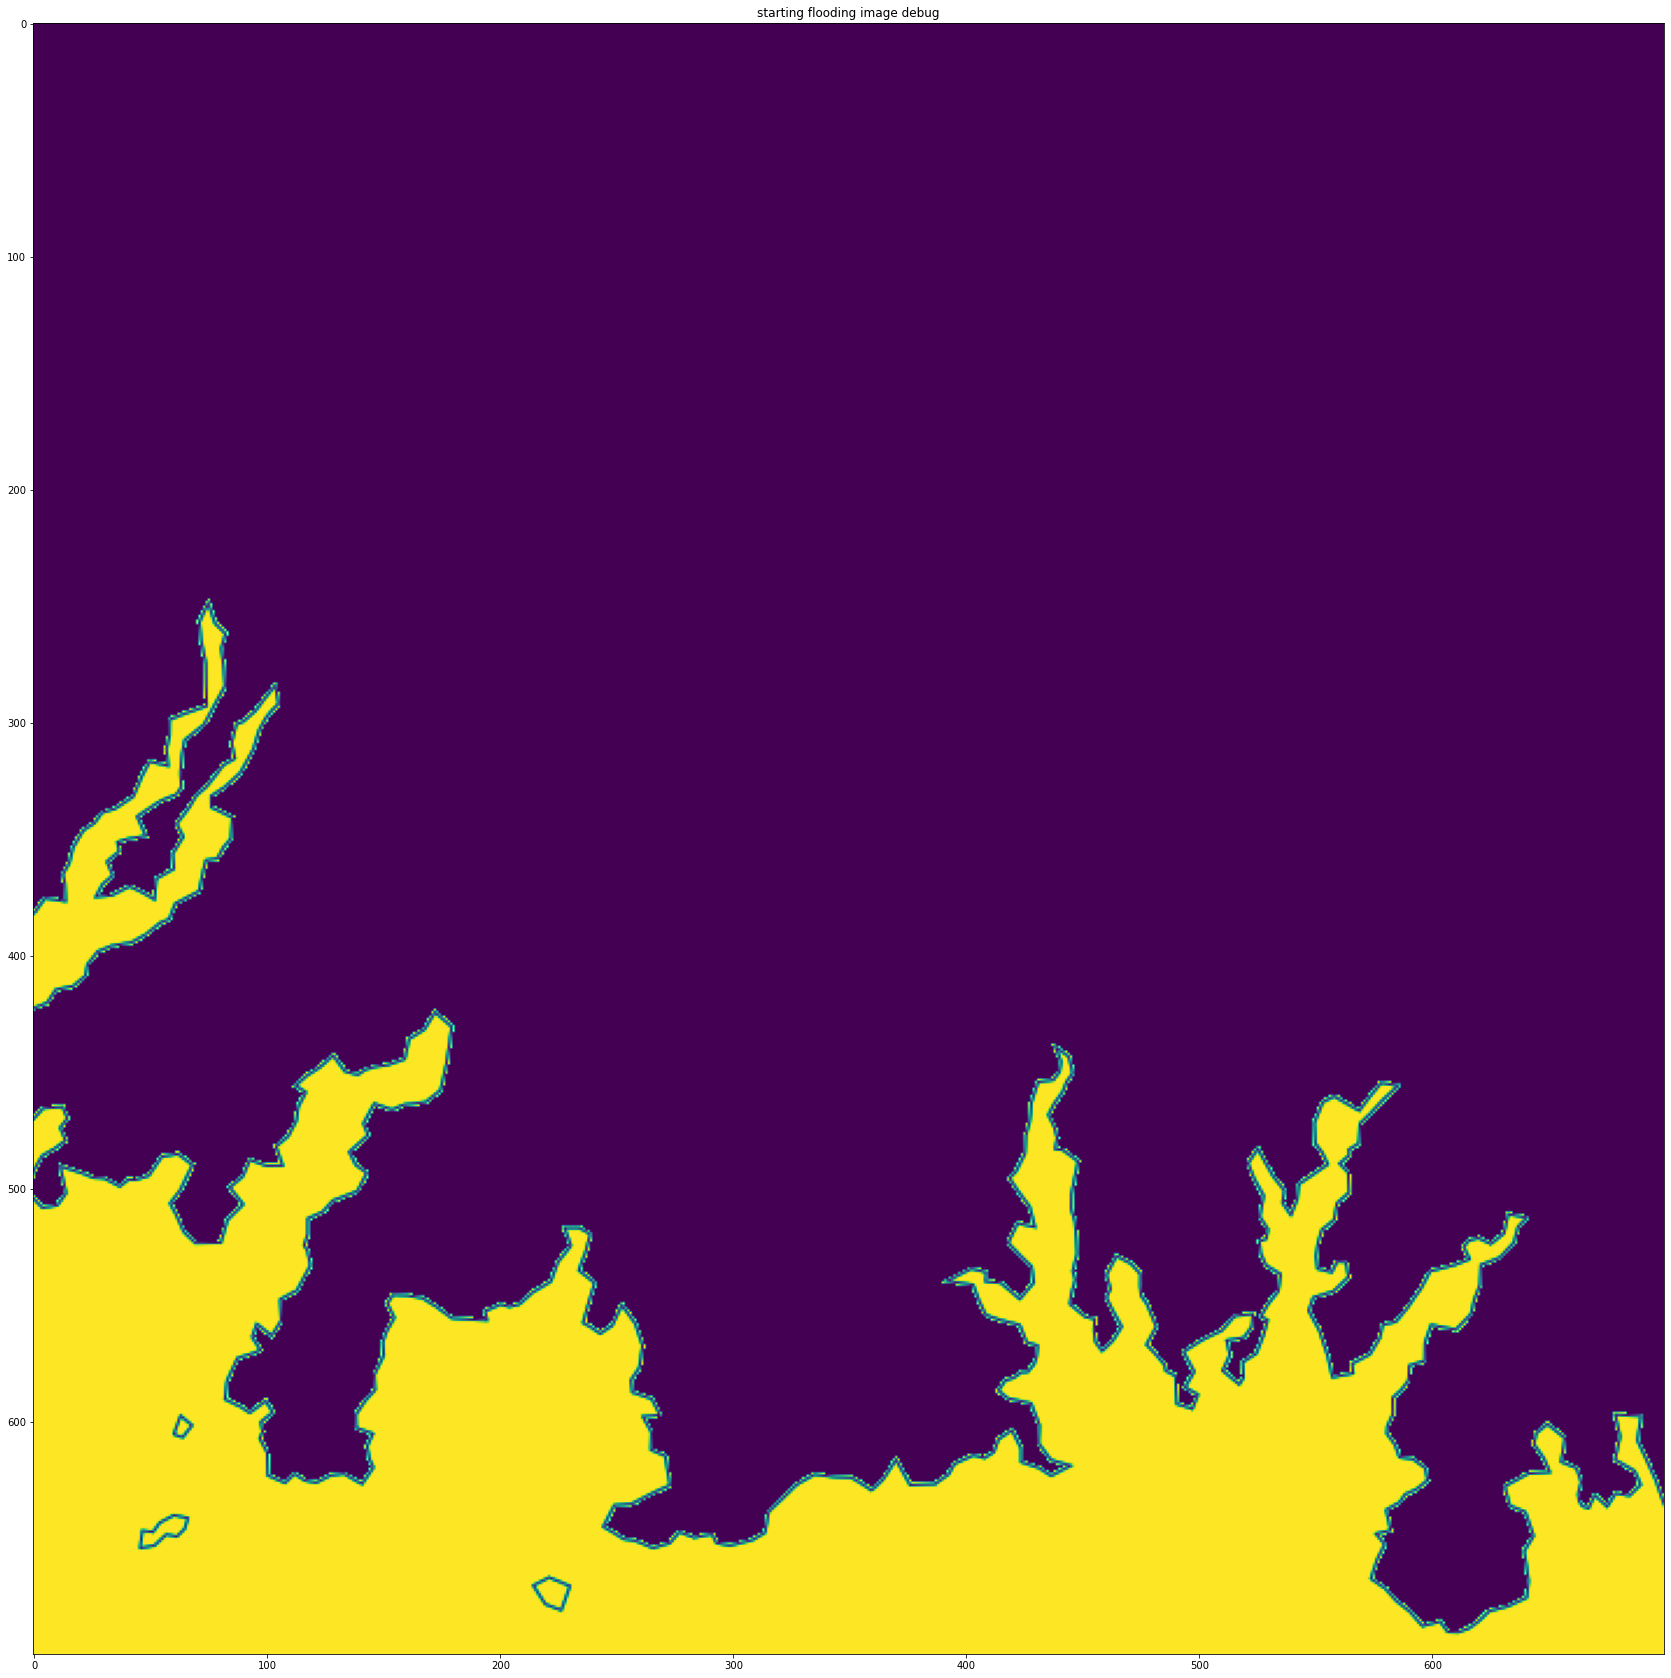

INFO:realms:    \---DONE
INFO:realms:----Cropping and flooding islands
INFO:realms:    \---DONE


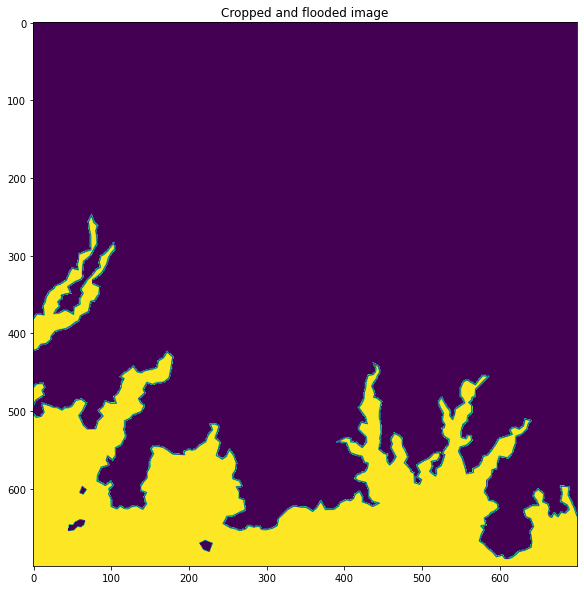

INFO:realms:----Refining flooded image


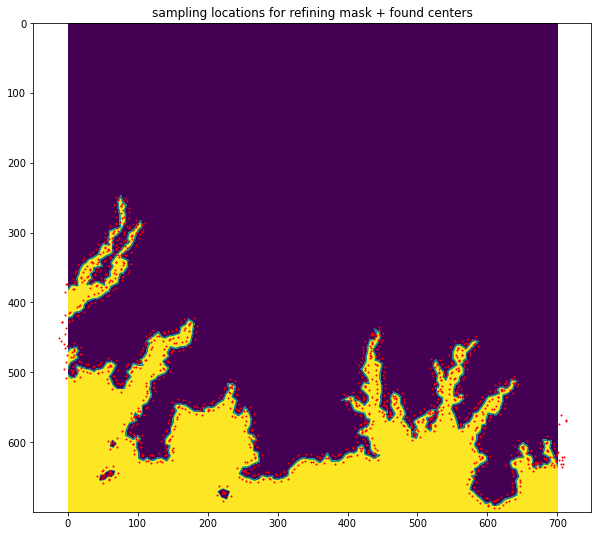

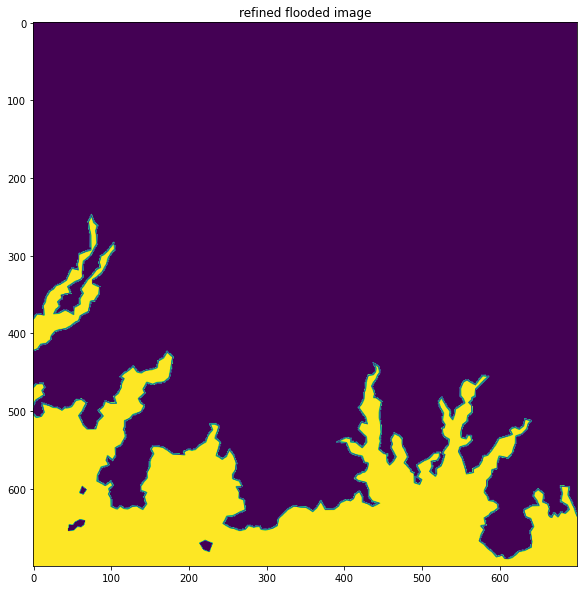

INFO:realms:    \---DONE
INFO:realms:----Extracting rivers


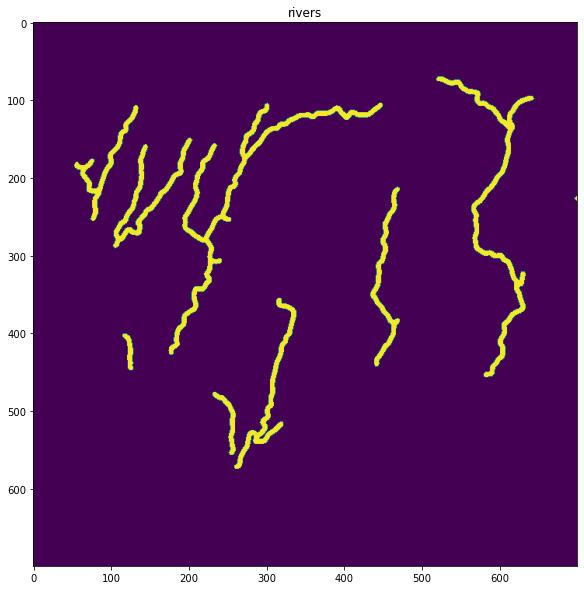

INFO:realms:    \---DONE
INFO:realms:----Extracting rivers


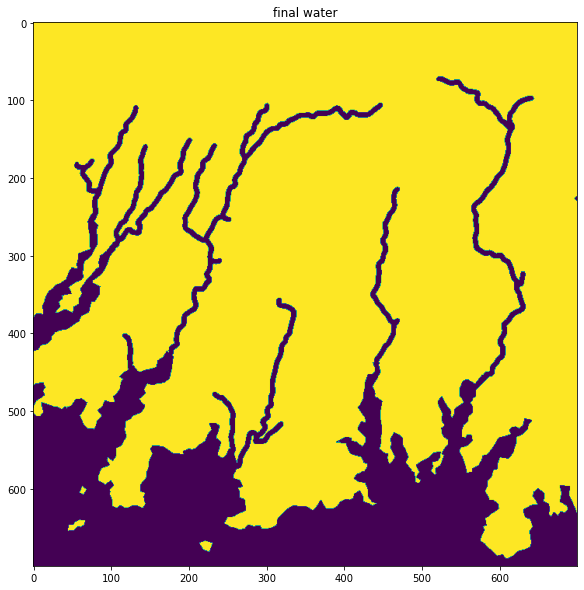

INFO:realms:    \---DONE
INFO:realms:----Terrain generation


  ...initial terrain shape
  ...sampling points
  ...delaunay triangulation
  ...initial height map
  ...river network
  ...final terrain height


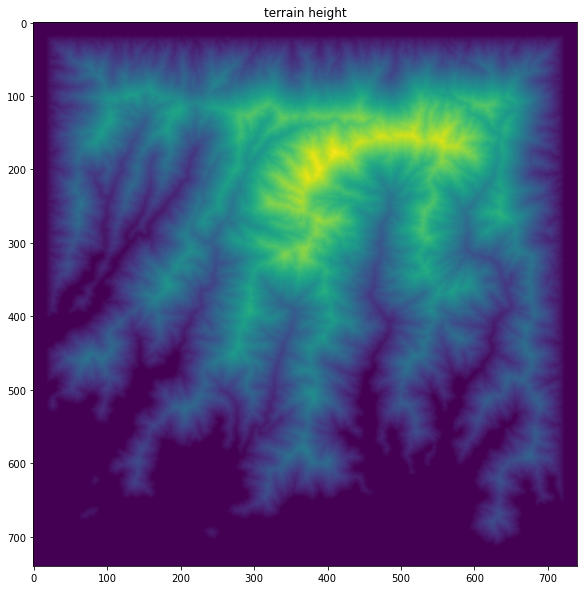

INFO:realms:    \---DONE
INFO:realms:----Underwater generation


  ...initial terrain shape
  ...sampling points
  ...delaunay triangulation
  ...initial height map
  ...river network
  ...final terrain height


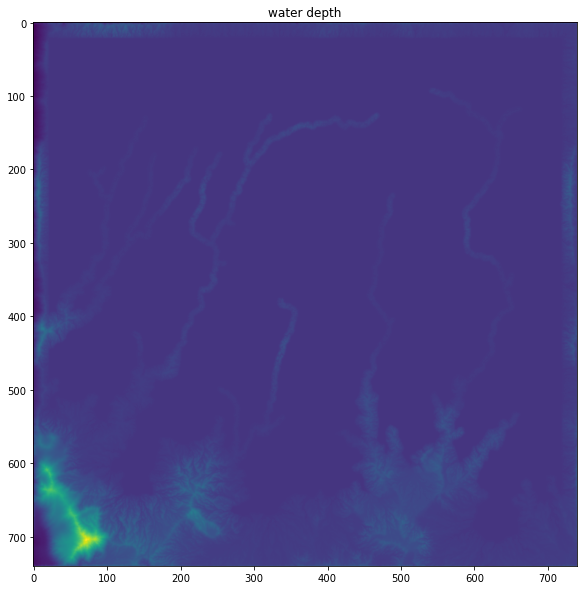

INFO:realms:    \---DONE
INFO:realms:----Combining terrain and water heights


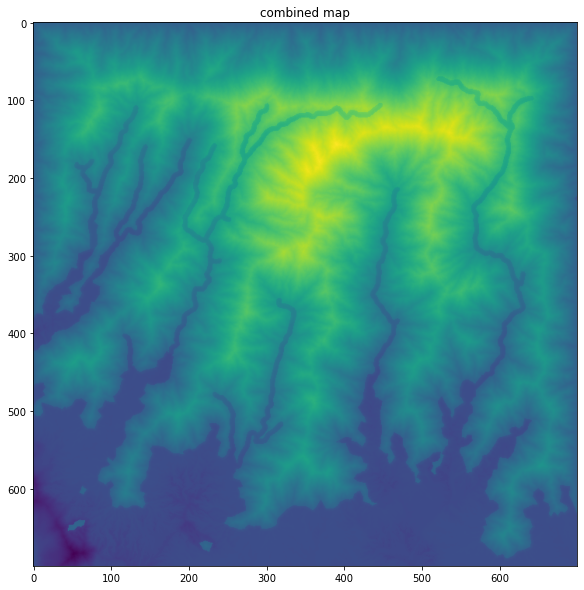

INFO:realms:    \---DONE
INFO:realms:Exporting height map
INFO:realms:    \---DONE


AttributeError: module 'PIL' has no attribute 'ImageOps'

In [10]:
run_pipeline(realm_selection.value, config, debug=True)